In [2]:
get_ipython().system('pip install clodsa')


In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
get_ipython().system('pip install matplotlib')

In [5]:
get_ipython().system('pip install --upgrade h5py')

  Using cached h5py-3.1.0-cp36-cp36m-win_amd64.whl (2.7 MB)
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\sukru\\anaconda3\\envs\\myenv23\\lib\\site-packages\\~5py\\defs.cp36-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



      Successfully uninstalled h5py-2.10.0


In [61]:
import os, os.path, shutil
import sys
import random

In [62]:
#import pandas as pd 
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import imageio

In [63]:

from skimage.io import imread
from skimage.segmentation import mark_boundaries
from skimage.measure import label, regionprops
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard


In [64]:


for num, flname in enumerate(os.listdir('C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\original\\images\\')): 
    print(flname)
    fn = flname
    flname = flname[:-9]
    flname = flname +'.png' 
    src ="C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\original\\images\\"+ fn 
    dst ="C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\original\\images\\"+ flname
    
    os.rename(src, dst) 

for num, flname in enumerate(os.listdir('C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\original\\segmaps\\')): 
    fn = flname
    flname = flname[:-6]
    flname = flname +'.png' 
    src ="C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\original\\segmaps\\"+ fn 
    dst ="C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\original\\segmaps\\"+ flname     

    os.rename(src, dst) 

.png


In [97]:

get_ipython().system('clodsa building_folder_folder_linear.json')

Traceback (most recent call last):
  File "C:\Users\sukru\anaconda3\envs\myenv23\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\sukru\anaconda3\envs\myenv23\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\sukru\anaconda3\envs\myenv23\Scripts\clodsa.exe\__main__.py", line 4, in <module>
  File "C:\Users\sukru\anaconda3\envs\myenv23\lib\site-packages\clodsa\__init__.py", line 2, in <module>
    from . import augment
  File "C:\Users\sukru\anaconda3\envs\myenv23\lib\site-packages\clodsa\augment.py", line 2, in <module>
    from .augmentors.augmentorFactory import createAugmentor
  File "C:\Users\sukru\anaconda3\envs\myenv23\lib\site-packages\clodsa\augmentors\__init__.py", line 1, in <module>
    from .augmentorFactory import *
  File "C:\Users\sukru\anaconda3\envs\myenv23\lib\site-packages\clodsa\augmentors\augmentorFactory.py", line 2, in <module>
    from .augmentorsList import Augmentors
  File "C:\Users\suk

In [98]:
x = "C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\original\\images"


In [99]:
p = [j for j in os.listdir(x) if os.path.isfile(os.path.join(x, j))]
p

[]

In [100]:
pt = ['original', 'method']
l = p
# Check if directory exists. If not, create it
for dr in pt:
    if os.path.isdir(f"C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\{dr}"):
        pass
    else:
        os.mkdir(f"C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\{dr}")

# Move files
for fname in l:  # traverse the files list
    print(fname)
    for i1 in pt: # compare which type it matches to
        if i1 in fname:
            shutil.move(f"C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\{fname}", f"C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\{img}\\{fname}") # move it to the respective directory
            break 

# Print contents of each folder
for dr in pt:
    print(f"\n\nContents of {dr}::::")
    print(os.listdir(f"C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\{dr}"))





Contents of original::::
['images', 'segmaps']


Contents of method::::
[]


In [101]:
seed = 1

In [102]:
plen=256

In [103]:
za = dict(rescale=1./255,
                     rotation_range=90.,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     zoom_range=0.2,
                     horizontal_flip=True,
                     vertical_flip=True,
                     shear_range=0.2,
                     validation_split=0.2
                    )
pz = ImageDataGenerator(**za)
mz = ImageDataGenerator(**za)

In [104]:

ps = 256

pa1 = dict(seed=seed,
    batch_size=32,
    shuffle=True,
    class_mode=None,
    target_size=(ps, ps),
    color_mode='rgb')

ma1 = dict(seed=seed,
    batch_size=32,
    class_mode=None,
    shuffle=True,
    target_size=(ps, ps), 
    color_mode='grayscale')

mgs = 'C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\outputs\\images\\'
mm = 'C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\outputs\\segmaps\\'

# combine generators to produce images and masks
tra = zip(pz.flow_from_directory(**pa1, directory=mgs),  
                      mz.flow_from_directory(**ma1, directory=mm))

vaa = zip(pz.flow_from_directory(**pa1, directory="C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\original\\images"),  
                      mz.flow_from_directory(**ma1, directory="C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\original\\segmaps"))


Found 372 images belonging to 1 classes.
Found 372 images belonging to 1 classes.
Found 93 images belonging to 1 classes.
Found 93 images belonging to 1 classes.


In [105]:
mf, mnf = next(tra)

In [106]:

i1v, mkv = next(vaa)

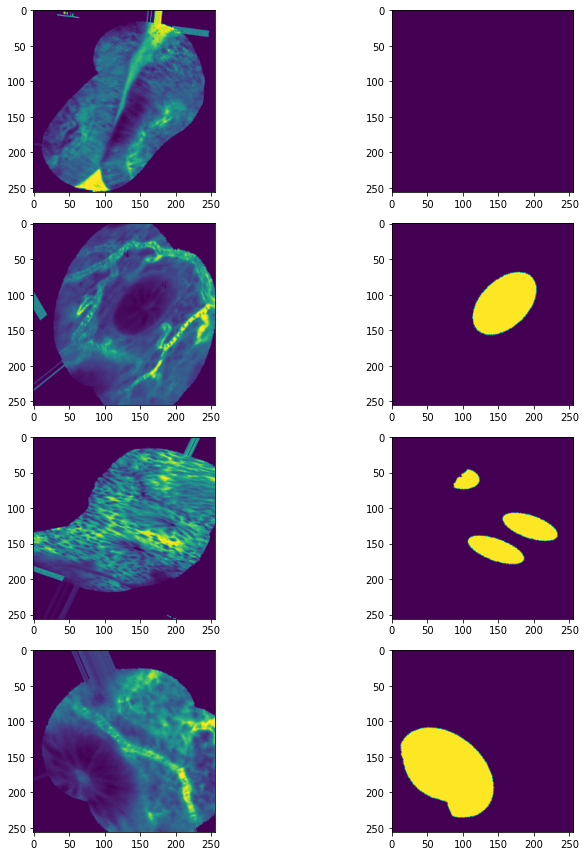

In [107]:
fig=plt.figure(figsize=(12,12))
n = 2
m = 4
incr = 0
c = 0
for k in range(1, n*m +1):
    fig.add_subplot(m, n, k)
    if incr%2 != 0:
        plt.imshow(mkv[c][:,:,0])
        c = c + 1
        
    else:
        plt.imshow(i1v[c][:,:,0])
    incr = incr + 1
    

plt.tight_layout()
plt.savefig('augmented.png')
plt.show()


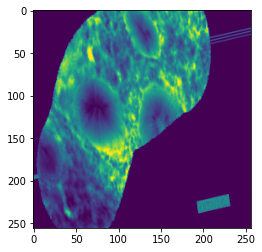

In [108]:
plt.imshow(mf[10][:,:,0])

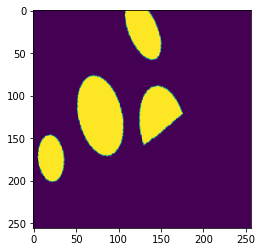

In [109]:
plt.imshow(mnf[10][:,:,0])

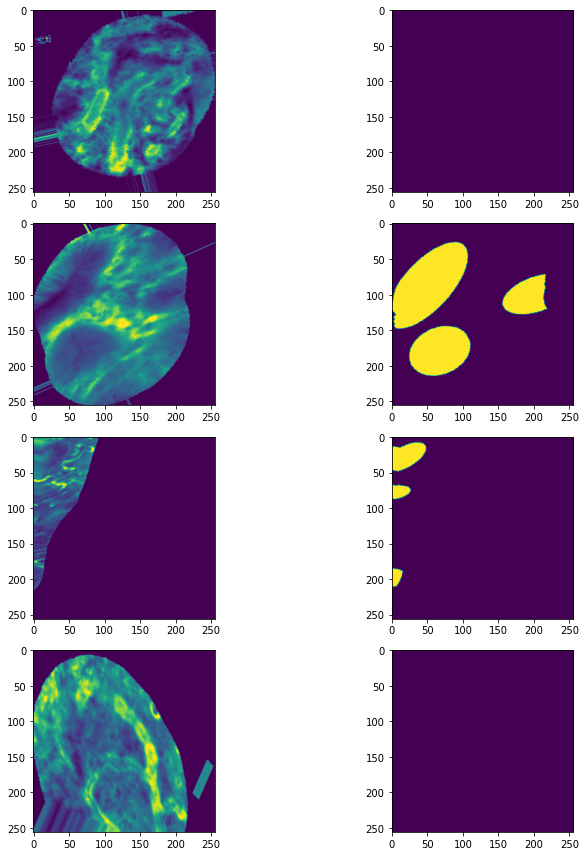

In [110]:
fig=plt.figure(figsize=(12,12))
n = 2
m = 4
incr = 0
c = 0
for i in range(1, n*m +1):
    fig.add_subplot(m, n, i)
    if incr%2 != 0:
        plt.imshow(mnf[c][:,:,0])
        c = c + 1
        
    else:
        plt.imshow(mf[c][:,:,0])
    incr = incr + 1
    

plt.tight_layout()
plt.savefig('augmented.png')
plt.show()


In [111]:

def coeffd(y_true, y_pred):
   
    y_true = tf.round(tf.reshape(y_true, [-1]))
    y_pred = tf.round(tf.reshape(y_pred, [-1]))
    isct = tf.reduce_sum(y_true * y_pred)
    return 2 * isct / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred))


In [112]:
def unetmodel():
    #f = [16, 32, 64, 128, 256]
    inputs = keras.layers.Input((plen, plen, 3))
    
    #256->128
    c1 = keras.layers.Conv2D(16, kernel_size=3, padding="same", strides=1, kernel_initializer = 'he_normal', activation="relu")(inputs)
    c1 = keras.layers.Conv2D(16, kernel_size=3, padding="same", strides=1,kernel_initializer = 'he_normal', activation="relu")(c1)
    p1 = keras.layers.MaxPool2D((2, 2), (2, 2))(c1)
    #128 -> 64
    c2 = keras.layers.Conv2D(32, kernel_size=3, padding="same", strides=1,kernel_initializer = 'he_normal', activation="relu")(p1)
    c2 = keras.layers.Conv2D(32, kernel_size=3, padding="same", strides=1,kernel_initializer = 'he_normal', activation="relu")(c2)
    p2 = keras.layers.MaxPool2D((2, 2), (2, 2))(c2)

    #64 -> 32
    c3 = keras.layers.Conv2D(64, kernel_size=3, padding="same", strides=1,kernel_initializer = 'he_normal', activation="relu")(p2)
    c3 = keras.layers.Conv2D(64, kernel_size=(3,3), padding="same", strides=1,kernel_initializer = 'he_normal', activation="relu")(c3)
    p3 = keras.layers.MaxPool2D((2, 2), (2, 2))(c3)
    
    #32 -> 16
    c4 = keras.layers.Conv2D(128, kernel_size=3, padding="same", strides=1,kernel_initializer = 'he_normal', activation="relu")(p3)
    c4 = keras.layers.Conv2D(128, kernel_size=3, padding="same", strides=1,kernel_initializer = 'he_normal', activation="relu")(c4)
    drop4 = keras.layers.Dropout(0.5)(c4)
    p4 = keras.layers.MaxPool2D((2, 2), (2, 2))(drop4)
    
    bn = keras.layers.Conv2D(256, kernel_size=3, padding="same", strides=1,kernel_initializer = 'he_normal', activation="relu")(p4)
    bn = keras.layers.Conv2D(256, kernel_size=3, padding="same", strides=1,kernel_initializer = 'he_normal', activation="relu")(bn)
    drop5 = keras.layers.Dropout(0.5)(bn)
   
    #16->32
    us1 = keras.layers.UpSampling2D((2, 2))(drop5)
    concat1 = keras.layers.Concatenate()([us1, c4])
    u1 = keras.layers.Conv2D(128, kernel_size=3, padding="same", strides=1,kernel_initializer = 'he_normal', activation="relu")(concat1)
    u1 = keras.layers.Conv2D(128, kernel_size=3, padding="same", strides=1,kernel_initializer = 'he_normal', activation="relu")(u1)
    
    #32->64
    us2 = keras.layers.UpSampling2D((2, 2))(u1)
    concat2 = keras.layers.Concatenate()([us2, c3])
    u2 = keras.layers.Conv2D(64, kernel_size=3, padding="same", strides=1,kernel_initializer = 'he_normal', activation="relu")(concat2)
    u2 = keras.layers.Conv2D(64, kernel_size=3, padding="same", strides=1,kernel_initializer = 'he_normal', activation="relu")(u2)
    
    #64->128
    us3 = keras.layers.UpSampling2D((2, 2))(u2)
    concat3 = keras.layers.Concatenate()([us3, c2])
    u3 = keras.layers.Conv2D(32, kernel_size=3, padding="same", strides=1,kernel_initializer = 'he_normal', activation="relu")(concat3)
    u3 = keras.layers.Conv2D(32, kernel_size=3, padding="same", strides=1,kernel_initializer = 'he_normal', activation="relu")(u3)
    
    #128->256
    us4 = keras.layers.UpSampling2D((2, 2))(u3)
    concat4 = keras.layers.Concatenate()([us4, c1])
    u4 = keras.layers.Conv2D(16, kernel_size=3, padding="same", strides=1,kernel_initializer = 'he_normal', activation="relu")(concat4)
    u4 = keras.layers.Conv2D(16, kernel_size=3, padding="same", strides=1,kernel_initializer = 'he_normal', activation="relu")(u4)
    
    
    outputs = keras.layers.Conv2D(1, (1, 1), padding="same", activation="sigmoid")(u4)
    model = keras.models.Model(inputs, outputs)
    return model


In [113]:
model = unetmodel()
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=[coeffd])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_57 (Conv2D)              (None, 256, 256, 16) 448         input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_58 (Conv2D)              (None, 256, 256, 16) 2320        conv2d_57[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_12 (MaxPooling2D) (None, 128, 128, 16) 0           conv2d_58[0][0]                  
__________________________________________________________________________________________________
conv2d_59 

In [114]:
tra_conv = (c for c in tra)

vaa_conv = (c for c in vaa)

In [130]:
history = model.fit(tra_conv, validation_data=vaa_conv, steps_per_epoch=100, validation_steps=16,epochs=40)


Epoch 1/2
5/5 [==============================] - 135s 27s/step - loss: 11.2058 - coeffd: 0.0000e+00 - val_loss: 10.8384 - val_coeffd: 0.0000e+00
Epoch 2/2
5/5 [==============================] - 123s 25s/step - loss: 8.6356 - coeffd: 0.0000e+00 - val_loss: 7.7772 - val_coeffd: 0.0000e+00


dict_keys(['loss', 'coeffd', 'val_loss', 'val_coeffd'])


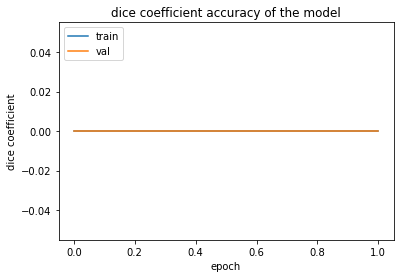

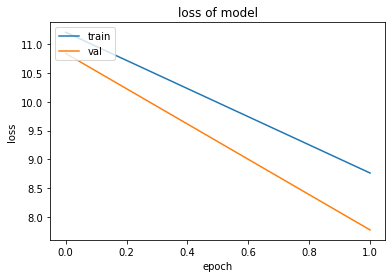

In [131]:
print(history.history.keys())
# Accuracy history

plt.plot(history.history['coeffd'])
plt.plot(history.history['val_coeffd'])
plt.title('dice coefficient accuracy of the model')
plt.ylabel('dice coefficient')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# sLoss history

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss of model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [132]:
# model.load_weights('C:\\Users\\sukru\\Desktop\\New folder\\content\\drive\\My Drive\\crypt\\model-weights\\Unet-420.h5')


In [133]:
model.save_weights("C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\model-weights\\Unet-420-87-121.h5")


In [134]:
i1, mk1 = next(vaa)

In [135]:
ou = model.predict(i1[3][np.newaxis, :])

Text(0.5, 1.0, 'Original Image')

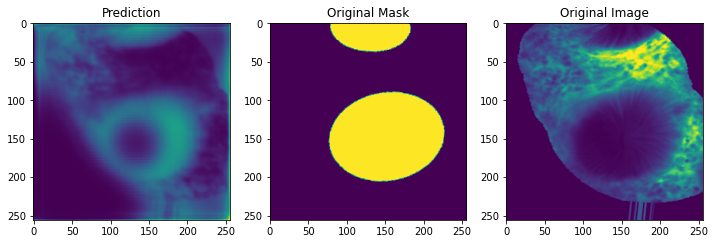

In [136]:
fig = plt.figure(figsize=(12,4))
axi = fig.add_subplot(1,3,1)
axi.imshow(ou[0,:,:,0])
axi.set_title('Prediction')
axj = fig.add_subplot(1,3,2)
axj.imshow(mk1[3,:,:,0])
axj.set_title('Original Mask')
axk = fig.add_subplot(1,3,3)
axk.imshow(i1[3,:,:,0])
axk.set_title('Original Image')


In [137]:
coeff= coeffd(mk1[3,:,:,0],ou[0,:,:,0] )
print(float(coeff))

TypeError: float() argument must be a string or a number, not 'Tensor'

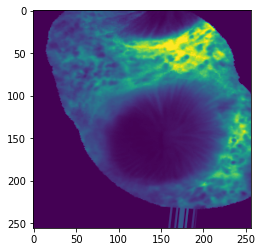

In [138]:
plt.imshow(i1[3,:,:,0])

In [139]:
coeff= coeffd(mk1[3,:,:,0],ou[0,:,:,0] )
print(float(coeff))

TypeError: float() argument must be a string or a number, not 'Tensor'

In [140]:
print(float(coeff))

TypeError: float() argument must be a string or a number, not 'Tensor'

In [141]:
first = cv2.imread('C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\original\\segmaps\\segmaps\\PAT_01_01.png')


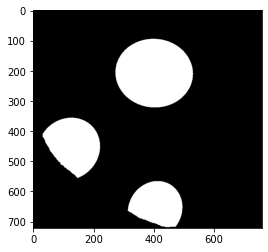

In [142]:
plt.imshow(first)

In [143]:

m11 = imageio.imread('C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\original\\segmaps\\segmaps\\PAT_03_01.png')
m12 = imageio.imread('C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\original\\images\\images\\PAT_03_01.png')


Image pp1
Found bbox (104, 868, 343, 1091)
Found bbox (130, 111, 267, 432)
Found bbox (405, 81, 621, 321)
Found bbox (456, 367, 692, 611)


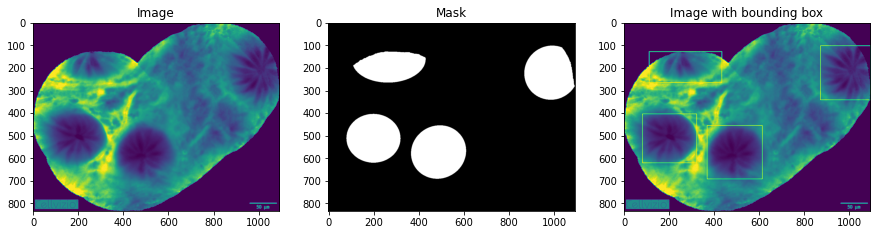

In [144]:
fig, (axi, axj, axk) = plt.subplots(1, 3, figsize = (15, 5))
last = cv2.imread('C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\original\\segmaps\\segmaps\\PAT_03_01.png')

lbl_0 = label(m11) 
q = regionprops(lbl_0)
m22 = m12.copy()
print ('Image', 'pp1')
for q1 in q:
    print('Found bbox', q1.bbox)
    cv2.rectangle(m12, (q1.bbox[1], q1.bbox[0]), (q1.bbox[3], q1.bbox[2]), (255, 0, 0), 2)

axi.imshow(m22)
axi.set_title('Image')
axj.set_title('Mask')
axk.set_title('Image with bounding box')
axj.imshow(last[...,0], cmap='gray')
axk.imshow(m12)
plt.show()
